In [10]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

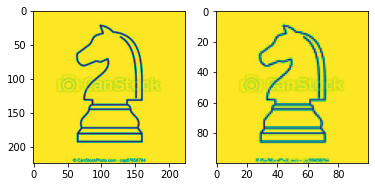

In [2]:
img=cv2.imread("C:/Programming Files/chess/knight-resize/00000004_resized.JPG",cv2.IMREAD_GRAYSCALE)
img1=cv2.resize(img,(100,100))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img1)

In [3]:
img_size=244

categories=["bishop_resized","knight-resize","pawn_resized","Queen-Resized","Rook-resize"]

def get_images(dir):
    images=[]
    labels=[]
    for category in categories:
        img_path=os.path.join(dir,category)
        category_num=categories.index(category)
        for img in os.listdir(img_path):
            try:
                get_image=cv2.imread(os.path.join(img_path,img))
                get_image=cv2.resize(get_image,(img_size,img_size))
                images.append(get_image)
                labels.append(category_num)
            except:
                pass

    return shuffle(images,labels)

In [4]:
data_dir="C:/Programming Files/chess"
img_data,img_label=get_images(data_dir)

In [5]:
img_data=np.array(img_data)
img_label=np.array(img_label)
(img_data.shape,img_label.shape)

((651, 244, 244, 3), (651,))

In [6]:
x_train,x_test,y_train,y_test=train_test_split(img_data,img_label,test_size=0.2,random_state=42)
x_train=x_train/255
x_test=x_test/255
(x_train.shape,x_test.shape)

((520, 244, 244, 3), (131, 244, 244, 3))

In [16]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=x_train.shape[1:],
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())

resnet_model.add(Dense(5))
resnet_model.add(Activation("softmax"))

resnet_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 5)                 10245     
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
trained_data=resnet_model.fit(x_train,y_train,epochs=12,validation_split=0.3)

Epoch 1/12
12/12 [==============================] - 63s 5s/step - loss: 1.8856 - accuracy: 0.1813 - val_loss: 1.6651 - val_accuracy: 0.2372
Epoch 2/12
12/12 [==============================] - 51s 4s/step - loss: 1.6956 - accuracy: 0.2033 - val_loss: 1.5507 - val_accuracy: 0.2756
Epoch 3/12
12/12 [==============================] - 45s 4s/step - loss: 1.5876 - accuracy: 0.2280 - val_loss: 1.5851 - val_accuracy: 0.2372
Epoch 4/12
12/12 [==============================] - 51s 4s/step - loss: 1.5766 - accuracy: 0.2582 - val_loss: 1.5430 - val_accuracy: 0.2885
Epoch 5/12
12/12 [==============================] - 52s 4s/step - loss: 1.5823 - accuracy: 0.2940 - val_loss: 1.5717 - val_accuracy: 0.2436
Epoch 6/12
12/12 [==============================] - 47s 4s/step - loss: 1.5559 - accuracy: 0.3049 - val_loss: 1.5370 - val_accuracy: 0.3269
Epoch 7/12
12/12 [==============================] - 58s 5s/step - loss: 1.5324 - accuracy: 0.2967 - val_loss: 1.5312 - val_accuracy: 0.2949
Epoch 8/12
12/12 [==

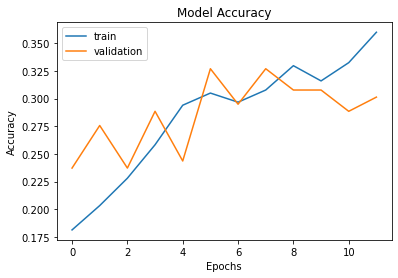

In [18]:
plt.plot(trained_data.history['accuracy'])
plt.plot(trained_data.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
resnet_model.evaluate(x_test,y_test,verbose=1)

5/5 [==============================] - 72s 14s/step - loss: 1.6120 - accuracy: 0.2443


[1.611979365348816, 0.2442748099565506]

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=x_train.shape[1:]),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(0.2,0.2,fill_mode="constant")
    #layers.experimental.preprocessing.RandomContrast(factor=0.2)
  ]
)

In [22]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,input_shape=x_train.shape[1:],pooling='avg',classes=5,weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

vgg_model.add(Flatten())

vgg_model.add(Dense(5))
vgg_model.add(Activation("softmax"))

vgg_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 2565      
                                                                 
 activation_2 (Activation)   (None, 5)                 0         
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
trained_data=vgg_model.fit(x_train,y_train,epochs=25,validation_split=0.3)

Epoch 1/25
12/12 [==============================] - 147s 13s/step - loss: 1.6523 - accuracy: 0.2665 - val_loss: 1.5328 - val_accuracy: 0.3397
Epoch 2/25
12/12 [==============================] - 148s 13s/step - loss: 1.5394 - accuracy: 0.3764 - val_loss: 1.5134 - val_accuracy: 0.4167
Epoch 3/25
12/12 [==============================] - 149s 13s/step - loss: 1.4899 - accuracy: 0.4231 - val_loss: 1.4750 - val_accuracy: 0.3974
Epoch 4/25
12/12 [==============================] - 148s 13s/step - loss: 1.4425 - accuracy: 0.4863 - val_loss: 1.4452 - val_accuracy: 0.4679
Epoch 5/25
12/12 [==============================] - 143s 12s/step - loss: 1.4035 - accuracy: 0.5302 - val_loss: 1.4224 - val_accuracy: 0.4744
Epoch 6/25
12/12 [==============================] - 142s 12s/step - loss: 1.3637 - accuracy: 0.5714 - val_loss: 1.3951 - val_accuracy: 0.5000
Epoch 7/25
12/12 [==============================] - 147s 13s/step - loss: 1.3299 - accuracy: 0.5989 - val_loss: 1.3746 - val_accuracy: 0.5321
Epoch 

In [24]:
vgg_model.evaluate(x_test,y_test,verbose=1)

5/5 [==============================] - 33s 7s/step - loss: 1.1428 - accuracy: 0.5802


[1.1428172588348389, 0.580152690410614]

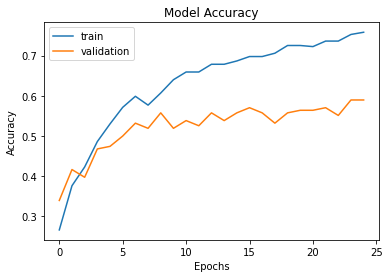

In [25]:
plt.plot(trained_data.history['accuracy'])
plt.plot(trained_data.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()